# APPLIED DATA SCIENCE ASSIGNMENT 

### FITTING AND CLUSTERING

In [170]:
# import libraries

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import silhouette_score


import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor



%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [171]:
# read and load dataset

mall_df = pd.read_csv("Mall_Customers.csv")
mall_df.tail(10)

# Mall_Customers.csv

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# EDA

## Rename columns

In [172]:
# rename columns
mall_df.drop(columns="CustomerID", inplace=True)
mall_df.rename(columns={"Age":"age", "Gender": "gender", "Annual Income (k$)": "annual_income",
                        "Spending Score (1-100)": "spending_score"}, inplace=True)
mall_df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [173]:
# shape of dataset

mall_df.shape

(200, 4)

In [174]:
# dataset summary

mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [175]:
# information about the datasets

mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [176]:
# Data encoding

mall_df["gender"] = preprocessing.LabelEncoder().fit_transform(mall_df["gender"])
# raw_data['gender'] = raw_data['Gender'].map({'Male':1, 'Female':0})
mall_df.tail()

,gender,age,annual_income,spending_score
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


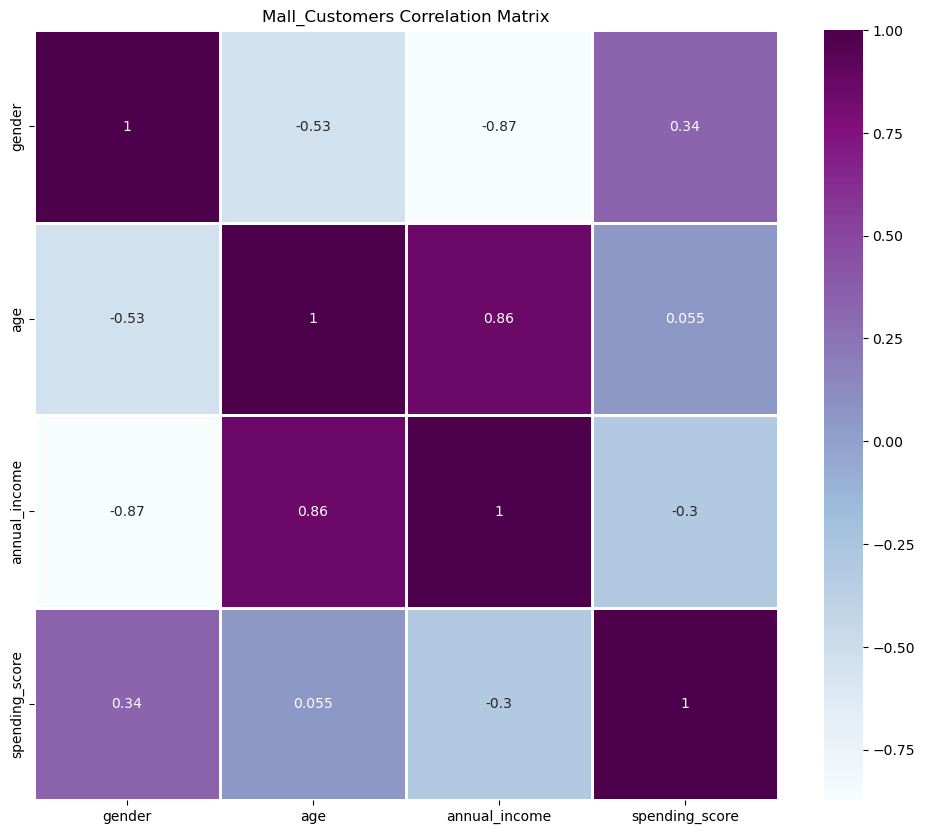

In [191]:
# create a numeric column

mall_df_num = mall_df.select_dtypes(include='number').head()

# heatmap

plt.figure(figsize = (12, 10))
sns.heatmap(mall_df_num.corr(),
           annot = True,
#           cmap = "Blues_r",
          cmap = 'BuPu',
           linewidths = 2,
           linecolor = "white")
plt.title("Mall_Customers Correlation Matrix")

plt.savefig('corr.png')
plt.show()


In [178]:
"""
plot of age vs spending score

"""

def plot_age_spending_score(data_df):
  sns.scatterplot(x="age",
                  y="spending_score",
                  data= data_df)
  plt.title('Relationship between spending score and annual income')
  plt.savefig('scatplot.png')
  plt.show()

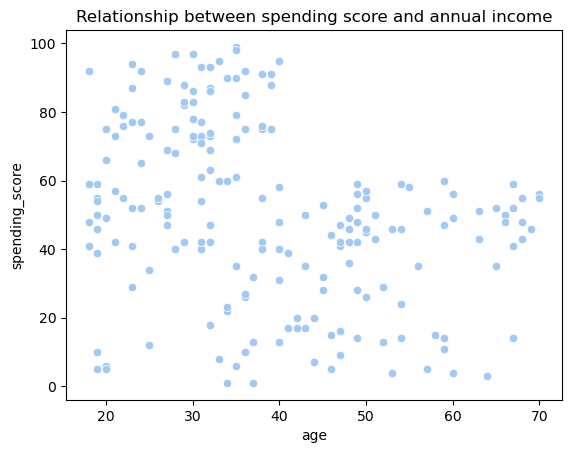

In [179]:
plot_age_spending_score(mall_df)

In [180]:

# Gender count

def gender_count(data_df):

  plt.figure(figsize=(5, 3))
  sns.countplot(data= data_df, x='gender', palette = "Set2")
  plt.title('Gender Count')
  plt.xlabel('Gender')
  plt.ylabel('Count')
  plt.grid(True)
  plt.show()

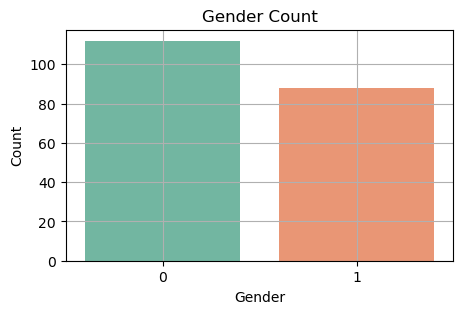

In [181]:
gender_count(mall_df)

In [182]:
# Gender count using pie chart

#plt.figure(figsize=(10,10))

#plt.subplot(2,2,1)
#sns.countplot(data=mall_df, x="gender", palette = "Set2")

#plt.subplot(2,2,2)
#plt.pie(mall_df["gender"].value_counts(), labels=["Female", "Male"], autopct='%.0f%%')

#plt.suptitle('Gender Count', fontsize = 25)
#plt.show()

In [183]:
# Gender count using pie chart

def gender_pie_chart(data_df):
  plt.pie(data_df["gender"].value_counts(), labels=["Female", "Male"], autopct='%.0f%%')
  plt.title('Pie Chart of Gender')
  plt.savefig('piechart.png')
    
  plt.show()

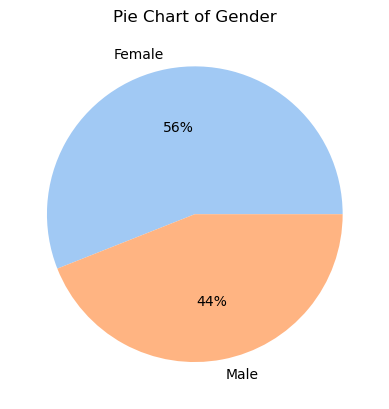

In [184]:
gender_pie_chart(mall_df)

In [185]:
# Distribution of four columns: age, gender, annual_income and spending_score

def distribution_(data_df):

  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# sns.histplot(data=raw_data, x="gender", bins=2, ax=axes[0,0], element="step")
  sns.distplot(data_df["gender"], ax=axes[0,0])

# sns.histplot(data=raw_data, x="age", bins=10, ax=axes[0,1], element="step", kde=True)
  sns.distplot(data_df["age"], ax=axes[0,1])

# sns.histplot(data=raw_data, x="annual_income", bins=20, ax=axes[1,0], element="step", kde=True)
  sns.distplot(data_df["annual_income"], ax=axes[1,0])

# sns.histplot(data=raw_data, x="spending_score", bins=20, ax=axes[1,1], element="step", kde=True)
  sns.distplot(data_df["spending_score"], ax=axes[1,1])

# plt.suptitle("Histogram", fontsize=20)
  plt.suptitle("Distributions", fontsize=20)
  plt.savefig('dist.png')
  plt.show()

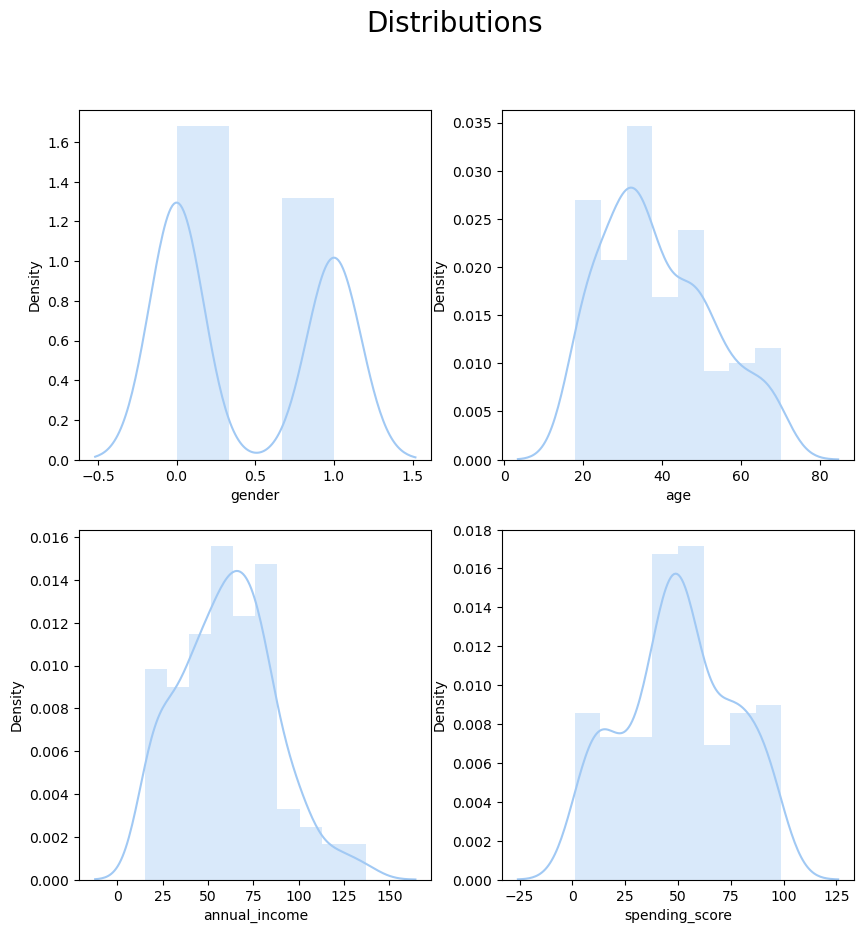

In [186]:
distribution_(mall_df)

In [188]:
# Age, Annual income, Spending score vs Gender

def gender_vs_others(data_df):

  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

  for a, b in enumerate(["age", "annual_income", "spending_score"]):
    sns.set_palette("pastel")

    ax = sns.boxplot(x='gender', y=b, data= data_df, ax=axes[a, 0])
    title = b + ' vs Gender'
    axes[a, 0].set_title(title)




    ax = sns.violinplot(x='gender', y=b, data=mall_df, ax=axes[a, 1])
    title = b + ' vs Gender'
    axes[a, 1].set_title(title)

  fig.suptitle('Features VS Gender', fontsize=20)
  plt.savefig('violin.png')
  plt.show()

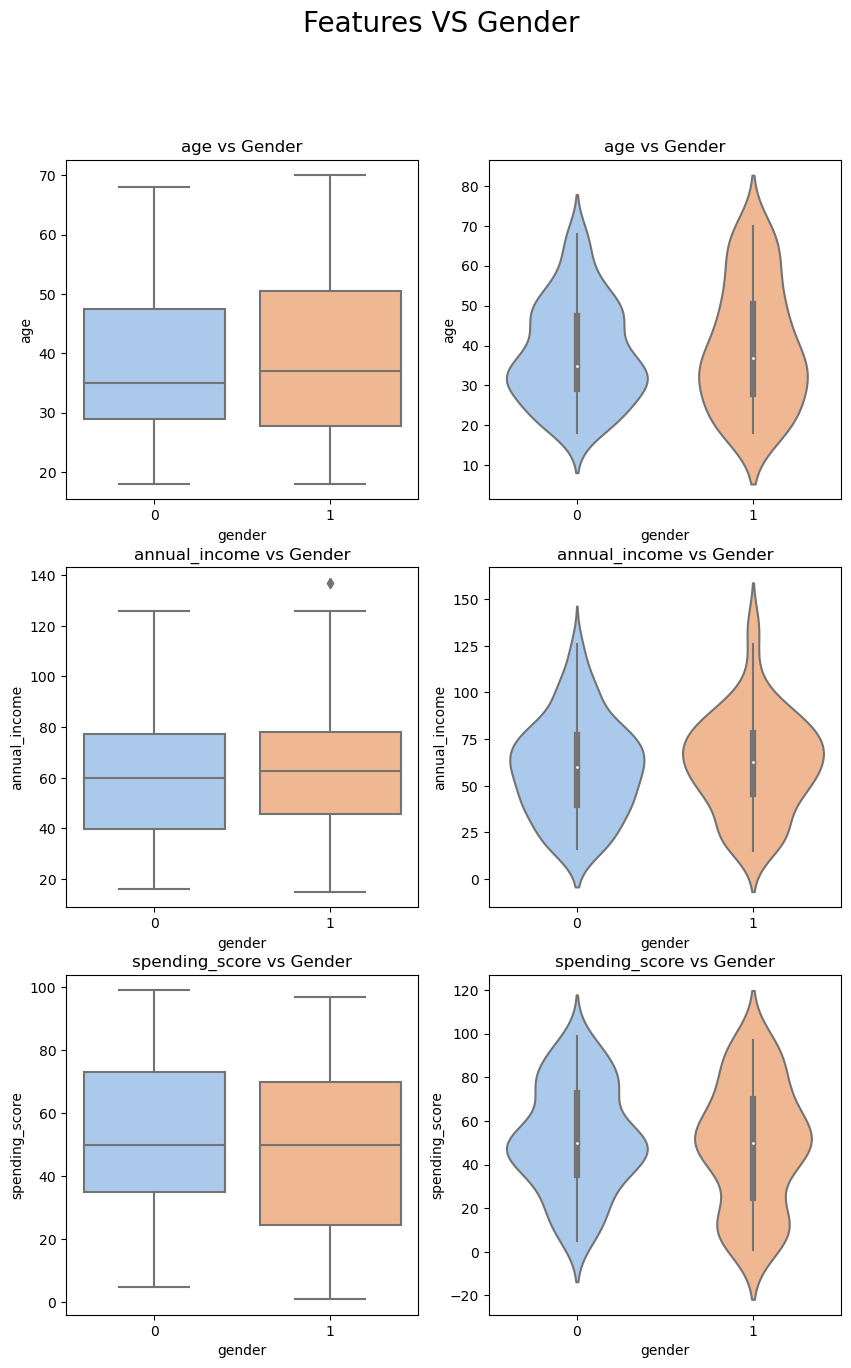

In [189]:
gender_vs_others(mall_df)

In [149]:
# scatterplot for numeric features

def scatterplot_numeric(data_df):

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

#sns.histplot(data=raw_data, x="annual_income", y="spending_score", cbar=True, bins=20, color="green", ax=axes[0])
  sns.scatterplot(data= data_df, x="annual_income", y="spending_score", hue="gender", ax=axes[0])
  axes[0].set_title("Annual Income (k$) vs Spending Score (1-100)")

#sns.histplot(data=raw_data, x="age", y="spending_score", cbar=True, bins=20, color="purple", ax=axes[1])
  sns.scatterplot(data= data_df, x="age", y="spending_score", hue="gender", ax=axes[1])
  axes[1].set_title("Age vs Spending Score (1-100)")

#sns.histplot(data=mall_df, x="annual_income", y="age", cbar=True, bins=20, color="red", ax=axes[2])
  sns.scatterplot(data= data_df, x="annual_income", y="age", hue="gender", ax=axes[2])
  axes[2].set_title(" Annual Income (k$) vs Age")

  plt.suptitle('Numerical Features Scatter Plot', fontsize=20)
  plt.show()

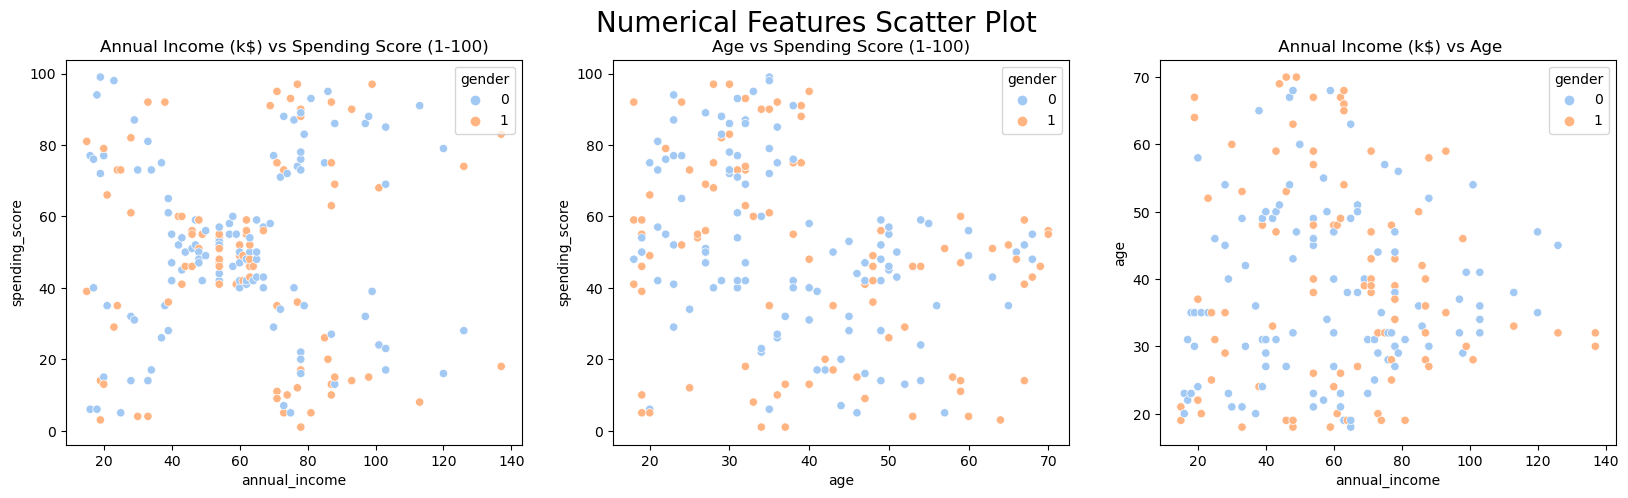

In [150]:
scatterplot_numeric(mall_df)

In [151]:
# Annual income vs Spending score

def plot_annual_income_spending_score(data_df):

  sns.scatterplot(x="spending_score",
                    y="annual_income",
                    data= data_df)
  plt.title('Relationship between spending score and annual income')
  plt.show()


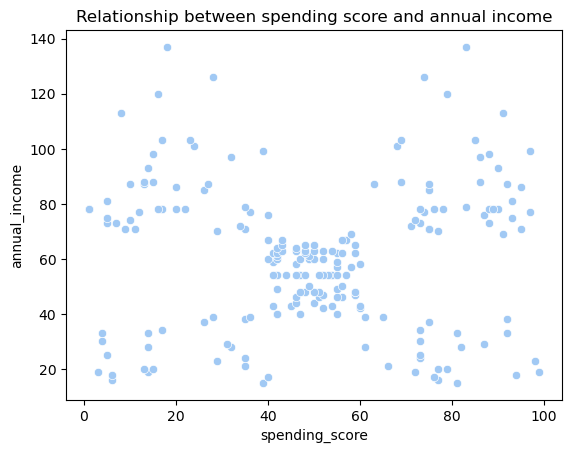

In [152]:
plot_annual_income_spending_score(mall_df)

In [153]:
# determining number of clusters using silhouette method

inert_list = []
sil_list = []
for k in range(2,8):
    mod = KMeans(n_clusters=k,init='k-means++',n_init=100)
    mod.fit(mall_df[['annual_income', 'spending_score']])
    inert_list.append(mod.inertia_)
    labels = mod.labels_
    sil_list.append(silhouette_score(mall_df[['annual_income', 'spending_score']],labels))


In [154]:
# silhoute score for each cluster

for k,score in enumerate(sil_list):
    print(f"The silhoute score for the {k+2} cluster is {score}")

The silhoute score for the 2 cluster is 0.2968969162503008
The silhoute score for the 3 cluster is 0.46761358158775435
The silhoute score for the 4 cluster is 0.4931963109249047
The silhoute score for the 5 cluster is 0.553931997444648
The silhoute score for the 6 cluster is 0.53976103063432
The silhoute score for the 7 cluster is 0.5281944387251989


In [155]:
# determining number of clusters using elbow method

ssw = []
clusters = range(1,10)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(mall_df[['annual_income', 'spending_score']])
    ssw.append(model.inertia_)

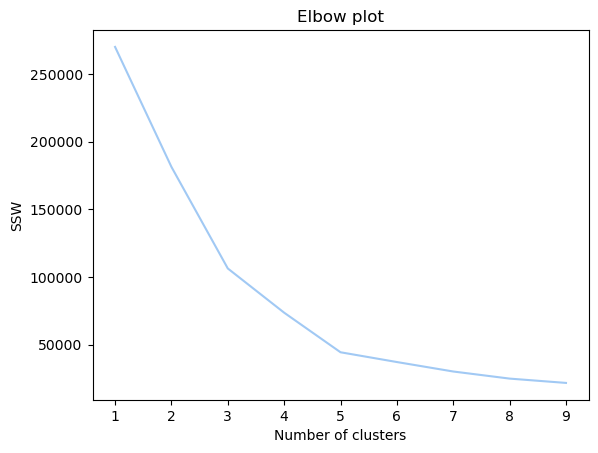

In [168]:
# Elbow curve plot

plt.xlabel("Number of clusters")
plt.ylabel("SSW")
plt.title("Elbow plot")
plt.plot(clusters , ssw);
plt.savefig('elbow.png')

In [157]:
# model fitting and predicting

model = KMeans(n_clusters = 5, init='k-means++',n_init=100)
y_pred  = model.fit_predict(mall_df[["spending_score" , "annual_income"]])
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [158]:
# assign y_pred to group

mall_df["group"] = y_pred


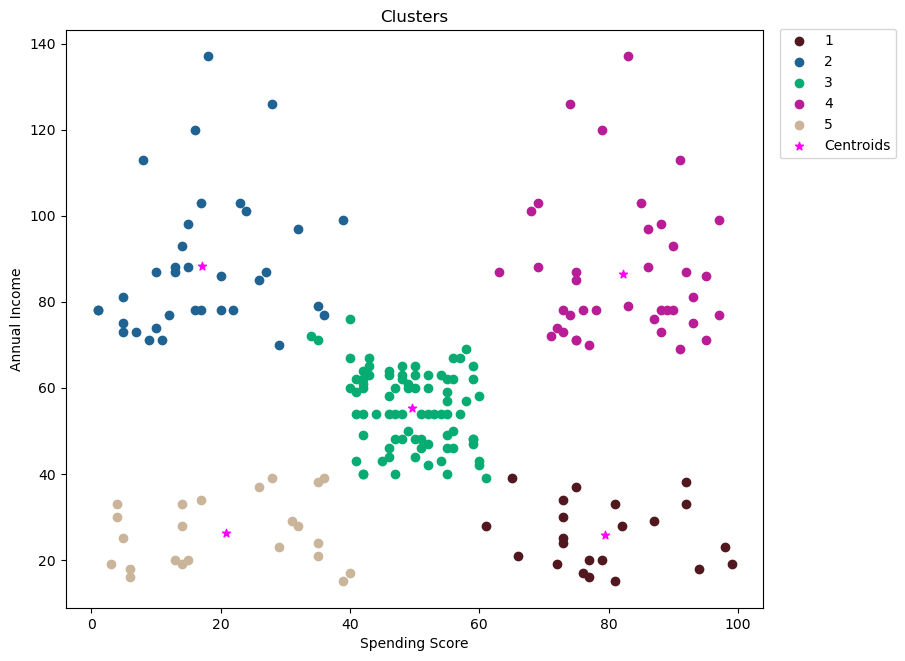

In [160]:
# Graph of clusters

df1=  mall_df[mall_df.group == 0]
df2=  mall_df[mall_df.group == 1]
df3=  mall_df[mall_df.group == 2]
df4=  mall_df[mall_df.group == 3]
df5=  mall_df[mall_df.group == 4]
plt.figure(figsize = (9,7.5))
plt.scatter(df1["spending_score"] , df1["annual_income"]  , color = "#521820" , label = "1")
plt.scatter(df2["spending_score"] , df2["annual_income"]  , color = "#1f6393" , label = "2")
plt.scatter(df3["spending_score"] , df3["annual_income"] , color = "#06ac72" , label = "3")
plt.scatter(df4["spending_score"] , df4["annual_income"], color = "#b91c97" , label = "4")
plt.scatter(df5["spending_score"] , df5["annual_income"] , color = "#cab59a" , label = "5")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.savefig('clustering.png')
plt.show()

# LINE FITTING MODEL

In [109]:
# change datatype tp float

mall_df= mall_df.astype(float)
mall_df.dtypes


gender            float64
age               float64
annual_income     float64
spending_score    float64
group             float64
dtype: object

# Create the model

We will choose age and spending score for our line fitting experiment, obviously from the correlation heatmap, both are not correlated, having a correlation coefficient of 0.005

In [110]:
# select age as X and spending score as Y

X= mall_df[['age']]
Y= mall_df[['spending_score']]
X.tail()

,age
195,35.0
196,45.0
197,32.0
198,32.0
199,30.0


In [111]:
# model ftting and result summary

lm = sm.add_constant(X)
result = sm.OLS(Y,lm).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         spending_score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.25e-06
Time:                        02:20:16   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7012      5.124     14.384      0.000      63.597      83.805
age           -0.6049      0.124     -4.873      0.000      -0.850      -0.360
==============================================================================
Omnibus:                       10.095   Durbin-Watson:                   3.451
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.957
Skew:                          -0.250   Prob(JB):                       0.0509
Kurtosis:                       2.318   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value below 0.05 means that the variable is significant.
The p-value for age is 0.00 which is lower than 0.05, hence age significant

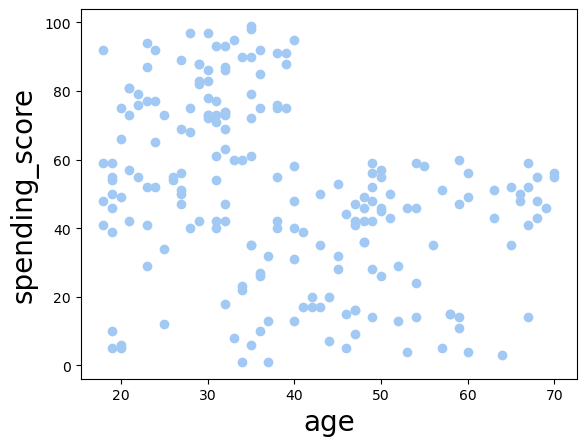

In [112]:
#scatterplot of age vs spending score

plt.scatter(X, Y)
plt.xlabel('age', fontsize = 20)
plt.ylabel('spending_score', fontsize = 20)

plt.show()
plt.show()

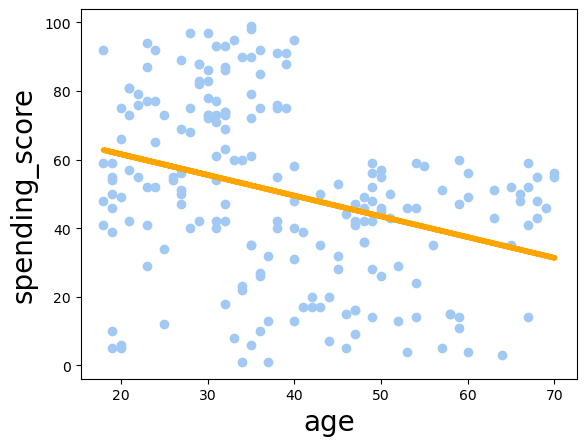

In [161]:
plt.scatter(X, Y)

yhat = -0.6049*X + 73.7012

fig = plt.plot(X,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('age', fontsize = 20)
plt.ylabel('spending_score', fontsize = 20)
plt.savefig('ols.png')
plt.show()
